In [ ]:
#dataframe
!gdown --id 1QYUJKtAdjiLFUy5WCtBEHAmowsYrR4Dx

Downloading...
From: https://drive.google.com/uc?id=1QYUJKtAdjiLFUy5WCtBEHAmowsYrR4Dx
To: /content/df.parquet
100% 146k/146k [00:00<00:00, 45.2MB/s]


In [ ]:
import pandas as pd
df = pd.read_parquet('df.parquet')
df

,music_id,music_name,music_lang,music_lyrics,art_name,main_genre,melspectrogram
0,3ade68b6g7c69fda3,Pra Mudar Minha Vida,pt-br,Queria tanto te dizer que eu já não te amo\nqu...,Zezé Di Camargo e Luciano,Sertanejo,"[0.7006166838170403, 0.6773452256608978, 0.832..."
1,3ade68b7g470c8ea3,Eu Só Vou Gostar de Quem Gosta de Mim,pt-br,De hoje em diante \nEu vou modificar \nO meu m...,Caetano Veloso,MPB,"[1.167459767154429, 1.1009481877141722, 1.0053..."
2,3ade68b8g92eaefa3,Take Care (Feat. Rihanna),en,Know you've been hurt by someone else\nI can t...,Drake,Rap,"[3.463227841836146, 2.848620215382162, 2.46518..."
3,3ade68b6gf0b1fda3,Luz do Sol,pt-br,"Luz do sol,\nQue a folha traga e traduz,\nEm v...",Caetano Veloso,MPB,"[0.12134681329903223, 0.2088434058914606, 0.26..."
4,3ade68b8g3f8fc0b3,Blue Tint,en,"Mario!\nHold up\nGang gang, gang gang, gang\n\...",Drake,Rap,"[14.076368416491201, 24.94810359613907, 38.319..."
5,3ade68b8g2c5a90b3,Summer Sixteen,en,Looking\nLooking Looking\nLooking\nLooking loo...,Drake,Rap,"[43.70564698814376, 62.8780866366905, 44.64717..."
6,3ade68b4g17c6eda3,Cryin',en,There was a time\nWhen I was so brokenhearted\...,Aerosmith,Rock,"[2.63869866420217, 1.6312668646396962, 0.60714..."
7,3ade68b8g2c06d0b3,Respeita o Nosso Fim,pt-br,Por favor\nNão beija outra boca na minha frent...,Gusttavo Lima,Sertanejo,"[6.879076212477134, 8.298251931851585, 8.00174..."
8,3ade68b4g2d96eda3,"Hello, Goodbye",en,"You say yes, I say no.\nYou say stop and I say...",The Beatles,Rock,"[21.679575040498133, 19.778692184440473, 17.06..."
9,3ade68b8gf562d0b3,Três Corações,pt-br,To aqui só esperando\nUma vacilada dele\nQuase...,Henrique e Juliano,Sertanejo,"[0.16103272552882036, 0.2392443912633282, 1.39..."


In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.8 MB/s 
     |████████████████████████████████| 3.4 MB 29.3 MB/s 
     |████████████████████████████████| 6.8 MB 22.1 MB/s 
     |████████████████████████████████| 1.2 MB 65.3 MB/s 
     |████████████████████████████████| 67 kB 6.1 MB/s 
     |████████████████████████████████| 596 kB 63.0 MB/s 
     |████████████████████████████████| 895 kB 65.0 MB/s 
     |████████████████████████████████| 3.3 MB 56.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=120999 sha256=defdb1caf6748288329a233e8fe9dd44c940c0aba990454a0ab96160a189932b
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distiluse-base-multilingual-cased')

In [ ]:
df['bert'] = list(embedder.encode(df.music_lyrics.to_list()))

In [ ]:
df

,music_id,music_name,music_lang,music_lyrics,art_name,main_genre,melspectrogram,bert
0,3ade68b6g7c69fda3,Pra Mudar Minha Vida,pt-br,Queria tanto te dizer que eu já não te amo\nqu...,Zezé Di Camargo e Luciano,Sertanejo,"[0.7006166838170403, 0.6773452256608978, 0.832...","[0.04501852, 0.036403667, 0.0076876846, 0.0030..."
1,3ade68b7g470c8ea3,Eu Só Vou Gostar de Quem Gosta de Mim,pt-br,De hoje em diante \nEu vou modificar \nO meu m...,Caetano Veloso,MPB,"[1.167459767154429, 1.1009481877141722, 1.0053...","[0.020214543, 0.010565973, 0.010698055, -0.008..."
2,3ade68b8g92eaefa3,Take Care (Feat. Rihanna),en,Know you've been hurt by someone else\nI can t...,Drake,Rap,"[3.463227841836146, 2.848620215382162, 2.46518...","[-0.020046176, 0.0093088765, 0.067888774, -0.0..."
3,3ade68b6gf0b1fda3,Luz do Sol,pt-br,"Luz do sol,\nQue a folha traga e traduz,\nEm v...",Caetano Veloso,MPB,"[0.12134681329903223, 0.2088434058914606, 0.26...","[-0.028454544, -0.025706183, -0.007432091, -0...."
4,3ade68b8g3f8fc0b3,Blue Tint,en,"Mario!\nHold up\nGang gang, gang gang, gang\n\...",Drake,Rap,"[14.076368416491201, 24.94810359613907, 38.319...","[0.034414105, 0.023063235, -0.037874553, -0.03..."
5,3ade68b8g2c5a90b3,Summer Sixteen,en,Looking\nLooking Looking\nLooking\nLooking loo...,Drake,Rap,"[43.70564698814376, 62.8780866366905, 44.64717...","[0.0032279063, 0.06567396, 0.0461435, -0.02398..."
6,3ade68b4g17c6eda3,Cryin',en,There was a time\nWhen I was so brokenhearted\...,Aerosmith,Rock,"[2.63869866420217, 1.6312668646396962, 0.60714...","[-0.02949136, 0.026074681, 0.020226939, 0.0034..."
7,3ade68b8g2c06d0b3,Respeita o Nosso Fim,pt-br,Por favor\nNão beija outra boca na minha frent...,Gusttavo Lima,Sertanejo,"[6.879076212477134, 8.298251931851585, 8.00174...","[-0.0059658536, -0.0018647189, -0.036939077, -..."
8,3ade68b4g2d96eda3,"Hello, Goodbye",en,"You say yes, I say no.\nYou say stop and I say...",The Beatles,Rock,"[21.679575040498133, 19.778692184440473, 17.06...","[0.012406171, 0.050815497, -0.019509368, -0.00..."
9,3ade68b8gf562d0b3,Três Corações,pt-br,To aqui só esperando\nUma vacilada dele\nQuase...,Henrique e Juliano,Sertanejo,"[0.16103272552882036, 0.2392443912633282, 1.39...","[-0.0072838995, 0.017000334, -0.0052466798, -0..."


In [ ]:
import numpy as np
np.array(df[df.music_id=='3ade68b6g7c69fda3'].melspectrogram.to_list()[0]).shape

(1292,)

In [ ]:
np.array(df[df.music_id=='3ade68b4g2d96eda3'].melspectrogram.to_list()[0]).shape

(1292,)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
X = np.array(df.melspectrogram.to_list())
#X = preprocessing.StandardScaler().fit_transform(X)
#X = X / np.linalg.norm(X)
kmeans = KMeans(n_clusters=4, random_state=2,init='random').fit(X)
df['audio_features'] = kmeans.labels_

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
X = np.array(df.bert.to_list())
#X = preprocessing.StandardScaler().fit_transform(X)
#X = X / np.linalg.norm(X)
kmeans = KMeans(n_clusters=3, random_state=2,).fit(X)
df['text_features'] = kmeans.labels_

In [ ]:
df.sort_values(by='main_genre')

,music_id,music_name,music_lang,music_lyrics,art_name,main_genre,melspectrogram,bert,audio_features,text_features
1,3ade68b7g470c8ea3,Eu Só Vou Gostar de Quem Gosta de Mim,pt-br,De hoje em diante \nEu vou modificar \nO meu m...,Caetano Veloso,MPB,"[1.167459767154429, 1.1009481877141722, 1.0053...","[0.020214543, 0.010565973, 0.010698055, -0.008...",3,2
3,3ade68b6gf0b1fda3,Luz do Sol,pt-br,"Luz do sol,\nQue a folha traga e traduz,\nEm v...",Caetano Veloso,MPB,"[0.12134681329903223, 0.2088434058914606, 0.26...","[-0.028454544, -0.025706183, -0.007432091, -0....",3,0
2,3ade68b8g92eaefa3,Take Care (Feat. Rihanna),en,Know you've been hurt by someone else\nI can t...,Drake,Rap,"[3.463227841836146, 2.848620215382162, 2.46518...","[-0.020046176, 0.0093088765, 0.067888774, -0.0...",3,2
4,3ade68b8g3f8fc0b3,Blue Tint,en,"Mario!\nHold up\nGang gang, gang gang, gang\n\...",Drake,Rap,"[14.076368416491201, 24.94810359613907, 38.319...","[0.034414105, 0.023063235, -0.037874553, -0.03...",0,0
5,3ade68b8g2c5a90b3,Summer Sixteen,en,Looking\nLooking Looking\nLooking\nLooking loo...,Drake,Rap,"[43.70564698814376, 62.8780866366905, 44.64717...","[0.0032279063, 0.06567396, 0.0461435, -0.02398...",2,0
6,3ade68b4g17c6eda3,Cryin',en,There was a time\nWhen I was so brokenhearted\...,Aerosmith,Rock,"[2.63869866420217, 1.6312668646396962, 0.60714...","[-0.02949136, 0.026074681, 0.020226939, 0.0034...",3,2
8,3ade68b4g2d96eda3,"Hello, Goodbye",en,"You say yes, I say no.\nYou say stop and I say...",The Beatles,Rock,"[21.679575040498133, 19.778692184440473, 17.06...","[0.012406171, 0.050815497, -0.019509368, -0.00...",3,1
0,3ade68b6g7c69fda3,Pra Mudar Minha Vida,pt-br,Queria tanto te dizer que eu já não te amo\nqu...,Zezé Di Camargo e Luciano,Sertanejo,"[0.7006166838170403, 0.6773452256608978, 0.832...","[0.04501852, 0.036403667, 0.0076876846, 0.0030...",3,2
7,3ade68b8g2c06d0b3,Respeita o Nosso Fim,pt-br,Por favor\nNão beija outra boca na minha frent...,Gusttavo Lima,Sertanejo,"[6.879076212477134, 8.298251931851585, 8.00174...","[-0.0059658536, -0.0018647189, -0.036939077, -...",1,2
9,3ade68b8gf562d0b3,Três Corações,pt-br,To aqui só esperando\nUma vacilada dele\nQuase...,Henrique e Juliano,Sertanejo,"[0.16103272552882036, 0.2392443912633282, 1.39...","[-0.0072838995, 0.017000334, -0.0052466798, -0...",1,2


In [ ]:
df.sort_values(by='main_genre').reset_index()[['music_id','main_genre']]

,music_id,main_genre
0,3ade68b7g470c8ea3,MPB
1,3ade68b6gf0b1fda3,MPB
2,3ade68b8g92eaefa3,Rap
3,3ade68b8g3f8fc0b3,Rap
4,3ade68b8g2c5a90b3,Rap
5,3ade68b4g17c6eda3,Rock
6,3ade68b4g2d96eda3,Rock
7,3ade68b6g7c69fda3,Sertanejo
8,3ade68b8g2c06d0b3,Sertanejo
9,3ade68b8gf562d0b3,Sertanejo


In [ ]:
df.to_pickle('df_quali_angelo_exemplo.pkl')

In [ ]:
import pandas as pd
df = pd.read_pickle('df_quali_angelo_exemplo.pkl')
df

,music_id,music_name,music_lang,music_lyrics,art_name,main_genre,melspectrogram,bert,audio_features,text_features
0,3ade68b6g7c69fda3,Pra Mudar Minha Vida,pt-br,Queria tanto te dizer que eu já não te amo\nqu...,Zezé Di Camargo e Luciano,Sertanejo,"[0.7006166838170403, 0.6773452256608978, 0.832...","[0.04501852, 0.036403667, 0.0076876846, 0.0030...",3,2
1,3ade68b7g470c8ea3,Eu Só Vou Gostar de Quem Gosta de Mim,pt-br,De hoje em diante \nEu vou modificar \nO meu m...,Caetano Veloso,MPB,"[1.167459767154429, 1.1009481877141722, 1.0053...","[0.020214543, 0.010565973, 0.010698055, -0.008...",3,2
2,3ade68b8g92eaefa3,Take Care (Feat. Rihanna),en,Know you've been hurt by someone else\nI can t...,Drake,Rap,"[3.463227841836146, 2.848620215382162, 2.46518...","[-0.020046176, 0.0093088765, 0.067888774, -0.0...",3,2
3,3ade68b6gf0b1fda3,Luz do Sol,pt-br,"Luz do sol,\nQue a folha traga e traduz,\nEm v...",Caetano Veloso,MPB,"[0.12134681329903223, 0.2088434058914606, 0.26...","[-0.028454544, -0.025706183, -0.007432091, -0....",3,0
4,3ade68b8g3f8fc0b3,Blue Tint,en,"Mario!\nHold up\nGang gang, gang gang, gang\n\...",Drake,Rap,"[14.076368416491201, 24.94810359613907, 38.319...","[0.034414105, 0.023063235, -0.037874553, -0.03...",0,0
5,3ade68b8g2c5a90b3,Summer Sixteen,en,Looking\nLooking Looking\nLooking\nLooking loo...,Drake,Rap,"[43.70564698814376, 62.8780866366905, 44.64717...","[0.0032279063, 0.06567396, 0.0461435, -0.02398...",2,0
6,3ade68b4g17c6eda3,Cryin',en,There was a time\nWhen I was so brokenhearted\...,Aerosmith,Rock,"[2.63869866420217, 1.6312668646396962, 0.60714...","[-0.02949136, 0.026074681, 0.020226939, 0.0034...",3,2
7,3ade68b8g2c06d0b3,Respeita o Nosso Fim,pt-br,Por favor\nNão beija outra boca na minha frent...,Gusttavo Lima,Sertanejo,"[6.879076212477134, 8.298251931851585, 8.00174...","[-0.0059658536, -0.0018647189, -0.036939077, -...",1,2
8,3ade68b4g2d96eda3,"Hello, Goodbye",en,"You say yes, I say no.\nYou say stop and I say...",The Beatles,Rock,"[21.679575040498133, 19.778692184440473, 17.06...","[0.012406171, 0.050815497, -0.019509368, -0.00...",3,1
9,3ade68b8gf562d0b3,Três Corações,pt-br,To aqui só esperando\nUma vacilada dele\nQuase...,Henrique e Juliano,Sertanejo,"[0.16103272552882036, 0.2392443912633282, 1.39...","[-0.0072838995, 0.017000334, -0.0052466798, -0...",1,2


In [ ]:
import networkx as nx

G = nx.Graph()
for index,row in df.iterrows():
  node1 = str(row['music_id'])+':music'
  node2 = str(row['audio_features'])+':audio'
  node3 = str(row['text_features'])+':text'
  G.add_edge(node1,node2)
  G.add_edge(node1,node3)
  G.nodes[node1]['genre'] = row['main_genre']
  G.nodes[node1]['melspectrogram'] = row['melspectrogram']
  G.nodes[node1]['bert'] = row['bert']

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
import random


def regularization(G, dim, embedding_feature: str = 'embedding', iterations=3):

    nodes = []

    # inicializando vetor f para todos os nodes
    for node in G.nodes():
        G.nodes[node]['f'] = np.array([0.0]*dim)
        if embedding_feature in G.nodes[node]:
            G.nodes[node]['f'] = G.nodes[node][embedding_feature]*1.0
        nodes.append(node)

    pbar = tqdm(range(0, iterations))

    for iteration in pbar:
        random.shuffle(nodes)
        energy = 0.0

        # percorrendo cada node
        for node in nodes:
            f_new = np.array([0.0]*dim)
            f_old = np.array(G.nodes[node]['f'])*1.0
            sum_w = 0.0

            # percorrendo vizinhos do onde
            w = 1
            for neighbor in G.neighbors(node):

                f_new += G.nodes[neighbor]['f']

                sum_w += w

            f_new /= sum_w

            G.nodes[node]['f'] = f_new*1.0

            if embedding_feature in G.nodes[node]:
                G.nodes[node]['f'] = G.nodes[node][embedding_feature]

            G.nodes[node]['f_'+embedding_feature] = G.nodes[node]['f']
            energy += np.linalg.norm(f_new-f_old)

        iteration += 1
        message = 'Iteration '+str(iteration)+' | Energy = '+str(energy)
        pbar.set_description(message)

    return G

In [ ]:
regularization(G,1292,'melspectrogram')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
regularization(G,512,'bert')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
for node in G.nodes():
  print(node)
  print(G.nodes[node]['f_bert'])
  print(G.nodes[node]['f_melspectrogram'])
  print('-----')

3ade68b6g7c69fda3:music
[ 4.50185202e-02  3.64036672e-02  7.68768461e-03  3.08473129e-03
  3.10058352e-02  1.12953261e-02 -3.25350091e-02 -1.27019361e-02
 -1.15004778e-02  1.94805451e-02 -4.04119082e-02  7.41136028e-03
  2.61377404e-03 -1.64875239e-02  7.05132773e-03  3.28426026e-02
  3.34181339e-02 -3.10923867e-02 -6.41596387e-04  2.62282714e-02
 -2.16483474e-02  2.78523508e-02  3.07035763e-02  1.64431930e-02
 -3.08900233e-03  3.29204872e-02 -2.79480219e-02 -5.78222331e-03
 -7.72831440e-02 -4.34188033e-03  1.41930170e-02 -3.07515394e-02
  1.98705327e-02 -5.80080114e-02 -4.08842787e-02 -5.42888381e-02
 -4.40693684e-02 -4.28200141e-02  5.87669238e-02  4.58491631e-02
 -3.45228724e-02  7.04031205e-03  7.46907247e-03 -1.22266950e-03
  4.18536291e-02 -1.41144479e-02  7.51757696e-02 -1.87625997e-02
  3.52705978e-02 -2.96267960e-02 -4.10330817e-02  4.13052402e-02
  1.64856240e-02  5.64732365e-02  1.34686027e-02 -7.84061290e-03
  3.32155079e-03  3.14777344e-02  3.92320789e-02  2.84813903e-02
 

In [ ]:
nx.write_gpickle(G,'graph.nx')

In [ ]:
!git clone https://github.com/dbusbridge/gcn_tutorial

Cloning into 'gcn_tutorial'...
remote: Enumerating objects: 69, done.
remote: Total 69 (delta 0), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (69/69), done.


In [ ]:
!mv gcn_tutorial/* .

In [ ]:
!pip install tensorflow==1.15.2

     |████████████████████████████████| 110.5 MB 40 kB/s 
     |████████████████████████████████| 503 kB 60.7 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 3.8 MB 60.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7216334123489fcf381260513d890d1656684d06320b39d4166dcfcd083b3014
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
import networkx as nx

G = nx.read_gpickle('graph.nx')

In [ ]:
# # labeling some nodes
# G.nodes['3ade68b8gf562d0b3:music']['label'] = 'Sertanejo'
# G.nodes['3ade68b7g470c8ea3:music']['label'] = 'MPB'
# G.nodes['3ade68b8g3f8fc0b3:music']['label'] = 'Rap'
# G.nodes['3ade68b4g2d96eda3:music']['label'] = 'Rock'

In [ ]:
for node in G.nodes():
  if ':music' in node:

    # if '3ade68b8gf562d0b3' in node: continue
    # if '3ade68b8g2c5a90b3' in node: continue
    label = df[df.music_id==node.replace(':music','')].main_genre.to_list()[0]
    G.nodes[node]['label']=label
    #Y.append(label)

In [ ]:
import networkx as nx
import numpy as np
import time

import scipy.sparse

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import tensorflow as tf

import layers.graph as lg
import utils.sparse as us

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
def masked_softmax_cross_entropy(preds, labels, mask):
    """Softmax cross-entropy loss with masking."""
    loss = tf.nn.softmax_cross_entropy_with_logits(logits=preds, labels=labels)
    mask = tf.cast(mask, dtype=tf.float32)
    mask /= tf.reduce_mean(mask)
    loss *= mask
    return tf.reduce_mean(loss)


def masked_accuracy(preds, labels, mask):
    """Accuracy with masking."""
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(labels, 1))
    accuracy_all = tf.cast(correct_prediction, tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    mask /= tf.reduce_mean(mask)
    accuracy_all *= mask
    return tf.reduce_mean(accuracy_all)

In [ ]:
for node in G.nodes():
  print(node)
  v1 = list(G.nodes[node]['f_melspectrogram'])
  v2 = list(G.nodes[node]['f_bert'])
  v_final = v1+v2
  
  break

3ade68b6g7c69fda3:music


In [ ]:
run = 1000

In [ ]:
from tqdm.notebook import tqdm

if True:

  run+=1
  network = str(run)
  node_list = []
  for node in G.nodes():
    node_list.append(node)

  label_codes = {}
  for node in node_list:
    if 'label' in G.nodes[node]:
      label = G.nodes[node]['label']
      if label not in label_codes: label_codes[label] = len(label_codes)
      G.nodes[node]['membership'] = label_codes[label]
    else: G.nodes[node]['membership'] = -1

  adj = nx.adj_matrix(G,nodelist=node_list)

  # Get important parameters of adjacency matrix
  n_nodes = adj.shape[0]

  # Some preprocessing
  adj_tilde = adj + np.identity(n=adj.shape[0])
  d_tilde_diag = np.squeeze(np.sum(np.array(adj_tilde), axis=1))
  d_tilde_inv_sqrt_diag = np.power(d_tilde_diag, -1/2)
  d_tilde_inv_sqrt = np.diag(d_tilde_inv_sqrt_diag)
  adj_norm = np.dot(np.dot(d_tilde_inv_sqrt, adj_tilde), d_tilde_inv_sqrt)
  adj_norm_tuple = us.sparse_to_tuple(scipy.sparse.coo_matrix(adj_norm))

  # Features are just the identity matrix
  #feat_x = np.identity(n=adj.shape[0])

  # Features from two modalities
  L_X = []
  for node in node_list:
    v1 = list(G.nodes[node]['f_melspectrogram'])
    v2 = list(G.nodes[node]['f_bert'])
    v_final = v1+v2
    L_X.append(v_final)
  feat_x = np.array(L_X)


  feat_x_tuple = us.sparse_to_tuple(scipy.sparse.coo_matrix(feat_x))

  # Preparing train data
  memberships = [m for m in nx.get_node_attributes(G, 'membership').values()]
  nb_classes = len(set(memberships))
  targets = np.array([memberships], dtype=np.int32).reshape(-1)
  one_hot_targets = np.eye(nb_classes)[targets]

  labels_to_keep = []

  counter = 0
  for node in node_list:
    if 'label' in G.nodes[node]:
      labels_to_keep.append(counter)
    counter += 1

  y_train = np.zeros(shape=one_hot_targets.shape,
                    dtype=np.float32)

  train_mask = np.zeros(shape=(n_nodes,), dtype=np.bool)

  for l in labels_to_keep:
      y_train[l, :] = one_hot_targets[l, :]
      train_mask[l] = True

  # TensorFlow placeholders
  ph = {
      'adj_norm': tf.sparse_placeholder(tf.float32, name="adj_mat"),
      'x': tf.sparse_placeholder(tf.float32, name="x"),
      'labels': tf.placeholder(tf.float32, shape=(n_nodes, nb_classes)),
      'mask': tf.placeholder(tf.int32)}

  l_sizes = [512, 256, 128, nb_classes]
  print(nb_classes)

  o_fc1 = lg.GraphConvLayer(
      input_dim=feat_x.shape[-1],
      output_dim=l_sizes[0],
      name='fc1_'+network,
      activation=tf.nn.tanh)(adj_norm=ph['adj_norm'], x=ph['x'], sparse=True)

  o_fc2 = lg.GraphConvLayer(
      input_dim=l_sizes[0],
      output_dim=l_sizes[1],
      name='fc2_'+network,
      activation=tf.nn.tanh)(adj_norm=ph['adj_norm'], x=o_fc1)

  o_fc3 = lg.GraphConvLayer(
      input_dim=l_sizes[1],
      output_dim=l_sizes[2],
      name='fc3_'+network,
      activation=tf.nn.tanh)(adj_norm=ph['adj_norm'], x=o_fc2)

  o_fc4 = lg.GraphConvLayer(
      input_dim=l_sizes[2],
      output_dim=l_sizes[3],
      name='fc4_'+network,
      activation=tf.identity)(adj_norm=ph['adj_norm'], x=o_fc3)


  with tf.name_scope('optimizer'):
      loss = masked_softmax_cross_entropy(preds=o_fc4, labels=ph['labels'], mask=ph['mask'])
      accuracy = masked_accuracy(preds=o_fc4, labels=ph['labels'], mask=ph['mask'])
      optimizer = tf.train.AdamOptimizer(learning_rate=1e-3)
      opt_op = optimizer.minimize(loss)

  feed_dict_train = {ph['adj_norm']: adj_norm_tuple,
                    ph['x']: feat_x_tuple,
                    ph['labels']: y_train,
                    ph['mask']: train_mask}

  sess = tf.Session()
  sess.run(tf.global_variables_initializer())

  epochs = 1000

  t = time.time()
  outputs = {}
  # Train model
  min_train_acc = 0
  for epoch in range(epochs):
      _, train_loss, train_acc = sess.run(
          (opt_op, loss, accuracy), feed_dict=feed_dict_train)
      feed_dict_output = {ph['adj_norm']: adj_norm_tuple, ph['x']: feat_x_tuple}

      #print(train_loss,train_acc)
      if train_acc >= min_train_acc:
        min_train_acc=train_acc
        embeddings = sess.run(o_fc3, feed_dict=feed_dict_output)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead



5


In [ ]:
embeddings

array([[ 0.06298686, -0.7920401 ,  0.9652449 , ..., -0.7910853 ,
         0.9410185 , -0.49789846],
       [ 0.8226714 ,  0.98395675, -0.8211127 , ...,  0.8546454 ,
        -0.96368754,  0.15551859],
       [ 0.78526527, -0.99366915,  0.9987743 , ..., -0.9774701 ,
         0.9947559 , -0.604766  ],
       ...,
       [-0.9979121 ,  0.99999446, -0.21962185, ...,  0.97851104,
         0.8597772 , -0.7216583 ],
       [-0.9996844 ,  0.9999976 ,  0.37611133, ...,  0.97323114,
         0.9870597 , -0.8541799 ],
       [ 0.16770798, -0.9996006 ,  0.9999166 , ..., -0.99611956,
         0.999895  , -0.81747794]], dtype=float32)

In [ ]:
from scipy.spatial.distance import pdist
import scipy
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy

import pandas as pd
embedding = embeddings
size = 30
params = {'legend.fontsize': 'large',
          'figure.figsize': (15,9),
          'axes.labelsize': size*0.7,
          'axes.titlesize': size*0.75,
          'xtick.labelsize': size*0.5,
          'ytick.labelsize': size*0.5,
          'axes.titlepad': 25, 
          "font.size": 50*0.75
          }
plt.rcParams.update(params)

counter = 0
c_X = []
c_Y = []
for node in G.nodes():
  if ':music' in node:
    c_X.append(embedding[counter])

    label = df[df.music_id==node.replace(':music','')].main_genre.to_list()[0]
    c_Y.append(label)

  counter += 1

c_X = np.array(c_X)

M = pdist(c_X)
Z = hierarchy.linkage(M, 'ward')
#for i in range(0,len(Y)):
  #print(i,Y[i])

#plt.savefig('cluster.pdf')




/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


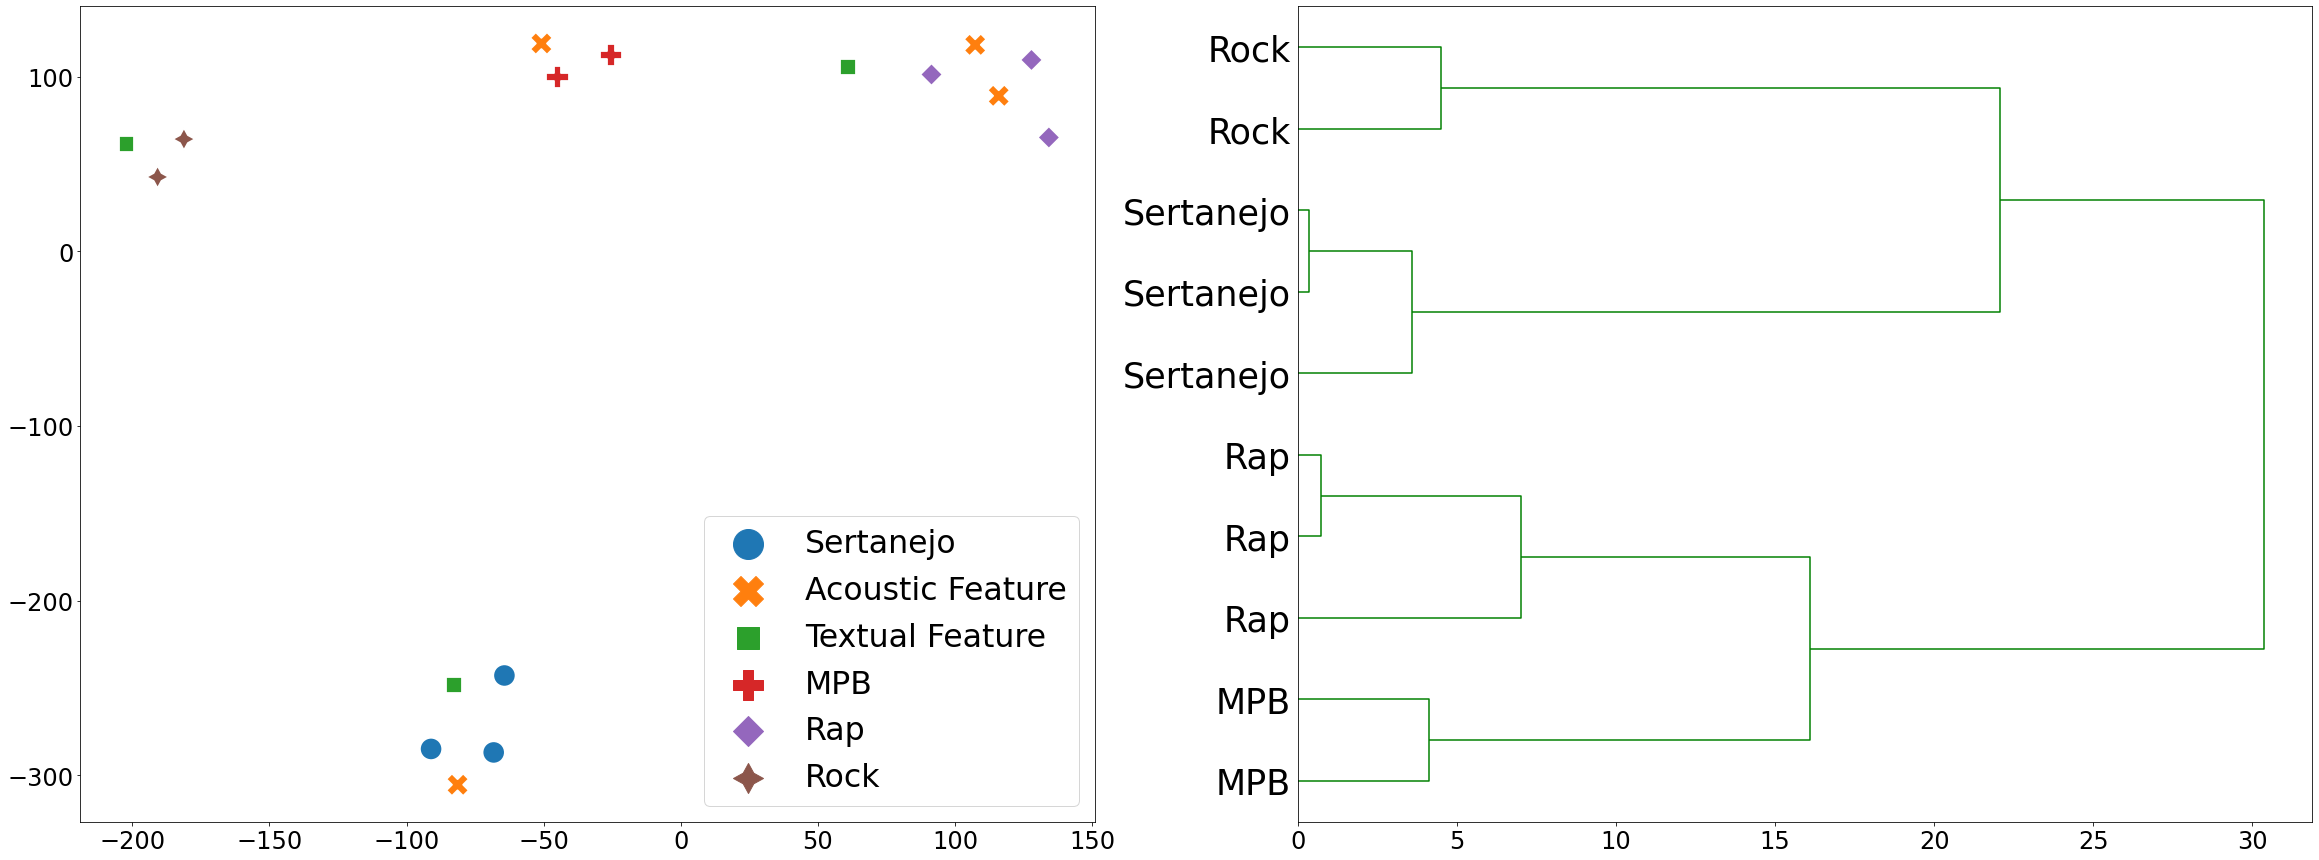

In [ ]:
import pandas as pd
embedding = embeddings

counter = 0
X = []
Y = []


for node in G.nodes():
  X.append(embedding[counter])
  if ':music' in node:
    label = df[df.music_id==node.replace(':music','')].main_genre.to_list()[0]
    Y.append(label)

  if ':audio' in node:
    label = 'Acoustic Feature'
    Y.append(label)

  if ':text' in node:
    label = 'Textual Feature'
    Y.append(label)

  counter += 1

X = np.array(X)

import numpy as np
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,perplexity=3).fit_transform(X)
X_embedded.shape

df_output = pd.DataFrame(X_embedded)
df_output['label'] = Y
df_output = df_output.dropna()
import pandas as pd
import seaborn as sns
import numpy as np
#import matplotlib.pyplot as plt

size = 30
params = {'legend.fontsize': 'large',
          'figure.figsize': (40,15),
          'axes.labelsize': size*0.7,
          'axes.titlesize': size*0.75,
          'xtick.labelsize': size*0.8,
          'ytick.labelsize': size*0.8,
          'axes.titlepad': 25, 
          "font.size": 35*0.75          
          }
plt.rcParams.update(params)

fig, ax = plt.subplots(ncols=2, nrows=1, gridspec_kw = {'wspace':0.2})#, sharex=True, sharey=True)

dendrogram = hierarchy.dendrogram(Z,labels=c_Y,color_threshold=100,orientation='right',ax=ax[1],leaf_font_size=35)

g = sns.scatterplot(x=0, y=1, data=df_output, hue="label", legend=True,style="label", s=500, ax=ax[0])
g.set(xlabel=None)
g.set(ylabel=None)

ax[0].legend(markerscale=5)
plt.savefig('gcn_cluster1.pdf')

In [ ]:
plt.show()

In [ ]:
plt.savefig('teste.pdf',bbox_inches='tight', pad_inches=0.2)


<Figure size 1080x648 with 0 Axes>